In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os, cv2


def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [2]:
# 1. Correct the path with an 'r'
dir_name = r"C:\Users\Sambi\Desktop\dataset\faces"

y = []
x = []
class_names = []
person_id = 0
h = w = 300
n_samples = 0

# 2. Loop through the folders (people)
for person_name in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, person_name)
    
    # Skip files, only look at folders
    if not os.path.isdir(dir_path):
        continue
        
    class_names.append(person_name)

    # 3. Loop through the images in each folder
    for image_name in os.listdir(dir_path):
        image_path = os.path.join(dir_path, image_name)

        img = cv2.imread(image_path)
        
        # Safety check: skip if file is not an image
        if img is None:
            print(f"Skipping: {image_name} (Not a valid image)")
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h, w))
        
        v = resized_image.flatten()
        x.append(v)
        
        y.append(person_id)
        n_samples += 1

    # Move to the next person ID after finishing one folder
    person_id += 1

# 4. Final conversion to arrays
y = np.array(y)
X = np.array(x)
target_names = np.array(class_names) # Use the unique names here
############################################
# transform list to numpy array
y = np.array(y)
X = np.array(x)
target_names = np.array(target_names)

n_features = X.shape[1]

print(y.shape, X.shape, target_names.shape)
print("Number of samples:", n_samples)

# Download the data, if not already on disk and load it as numpy arrays

# lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
# n_samples, h, w = lfw_people.images.shape
# print(n_samples, h, w)

# for machine learning we use the 2 data directly
# (as relative pixel positions info is ignored by this model)
# X = lfw_people.data
# n_features = X.shape[1]

# print(X.shape)

# the label to predict is the id of the person
# y = lfw_people.target
# print(y)

# if 0 in y:
#     print("yes")

# target_names = lfw_people.target_names
# print(target_names)

n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

(450,) (450, 90000) (9,)
Number of samples: 450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 9


Extracting the top 150 eigenfaces from 337 faces


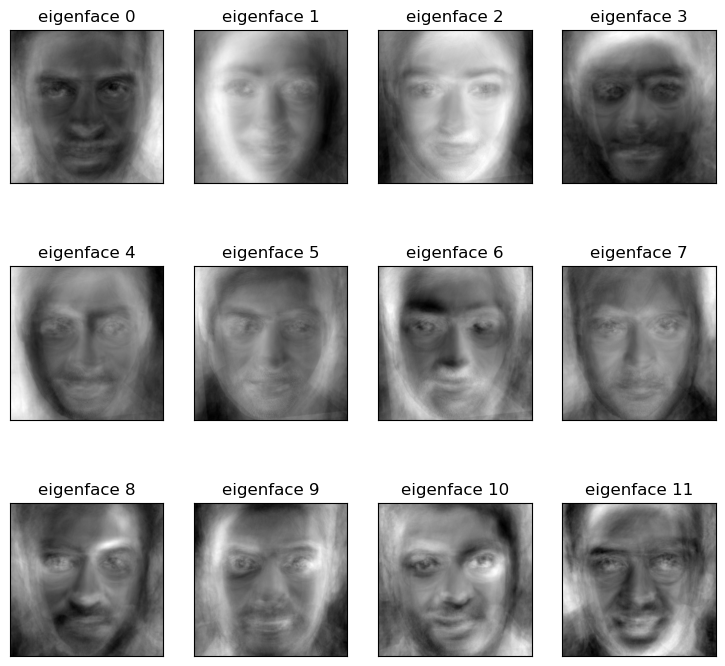

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Project done...


In [3]:
########################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

########################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction

n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))

# Applying PCA
pca = PCA(n_components=n_components,
          svd_solver='randomized',
          whiten=True).fit(X_train)

# Generating eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))

# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface %d" % i
                    for i in range(eigenfaces.shape[0])]

plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

# %%Compute Fisherfaces
lda = LinearDiscriminantAnalysis()
#Compute LDA of reduced data
lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print("Project done...")

In [5]:
# Training with Multi Layer Perceptron
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10), max_iter=1000, verbose=True).fit(X_train_lda,y_train)
print("Model weights:")
model_info = [coef.shape for coef in clf.coefs_]

clf.fit(X_train_lda, y_train)

Iteration 1, loss = 2.59604868
Iteration 2, loss = 2.55230263
Iteration 3, loss = 2.51192832
Iteration 4, loss = 2.47208500
Iteration 5, loss = 2.43278325
Iteration 6, loss = 2.39519077
Iteration 7, loss = 2.36122722
Iteration 8, loss = 2.32558031
Iteration 9, loss = 2.29277853
Iteration 10, loss = 2.26170600
Iteration 11, loss = 2.23224611
Iteration 12, loss = 2.20233442
Iteration 13, loss = 2.17375092
Iteration 14, loss = 2.14685261
Iteration 15, loss = 2.12018415
Iteration 16, loss = 2.09456590
Iteration 17, loss = 2.06930702
Iteration 18, loss = 2.04488135
Iteration 19, loss = 2.02176842
Iteration 20, loss = 1.99772570
Iteration 21, loss = 1.97531390
Iteration 22, loss = 1.95309106
Iteration 23, loss = 1.93049346
Iteration 24, loss = 1.90913466
Iteration 25, loss = 1.88818595
Iteration 26, loss = 1.86653626
Iteration 27, loss = 1.84619654
Iteration 28, loss = 1.82469911
Iteration 29, loss = 1.80426093
Iteration 30, loss = 1.78384940
Iteration 31, loss = 1.76337710
Iteration 32, los

,hidden_layer_sizes,"(10, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,1


Accuracy: 70.79646017699115


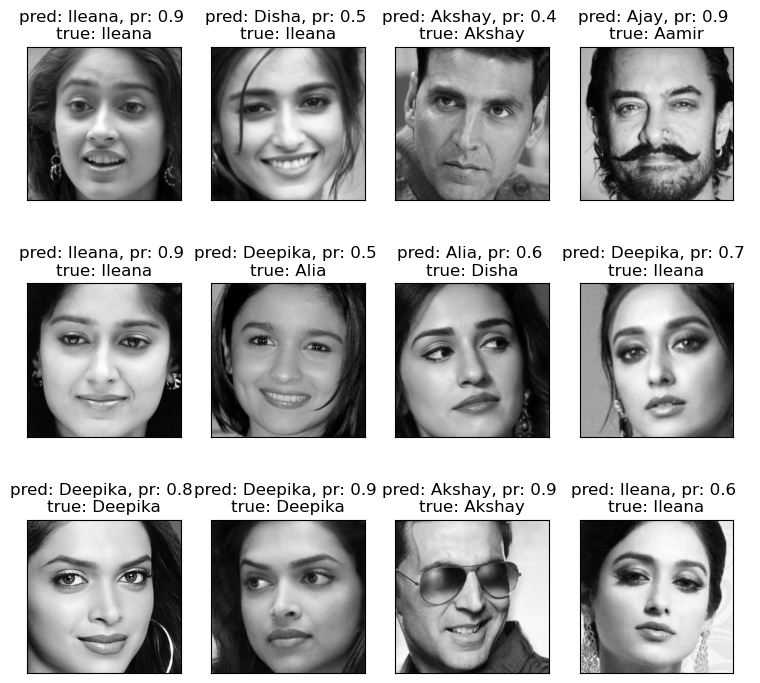

In [7]:
In [5]: y_pred=[]
y_prob=[]
for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    # print(prob,np.max(prob))
    class_id = np.where(prob == np.max(prob))[0][0]
    # print(class_index)
    # find the label of the matched face
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

# Transform the data
y_pred = np.array(y_pred)

prediction_titles=[]
true_positive = 0
for i in range(y_pred.shape[0]):
    # print(y_test[i],y_pred[i])
    # true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    # pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[0:3], true_name)
    # result = 'prediction: %s \ntrue: %s' % (pred_name, true_name)
    prediction_titles.append(result)
    if true_name==pred_name:
        true_positive = true_positive+1

print("Accuracy:", true_positive*100/y_pred.shape[0])

# Plot results
plot_gallery(X_test, prediction_titles, h, w)
plt.show()